In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [42]:
df = pd.read_csv('goalscorers.csv')
df.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44110 entries, 0 to 44109
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44110 non-null  object 
 1   home_team  44110 non-null  object 
 2   away_team  44110 non-null  object 
 3   team       44110 non-null  object 
 4   scorer     44060 non-null  object 
 5   minute     43847 non-null  float64
 6   own_goal   44108 non-null  object 
 7   penalty    44108 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.7+ MB


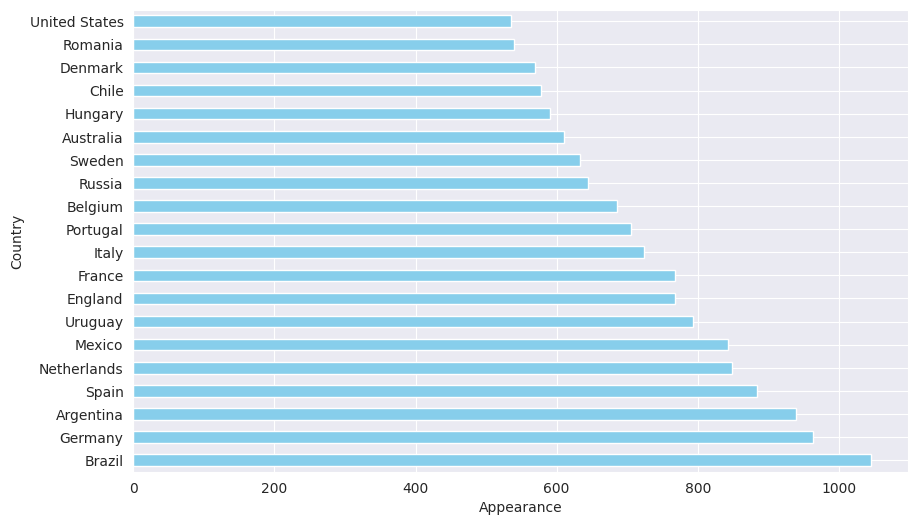

In [10]:
# Crear la figura y el gráfico de barras horizontal
plt.figure(figsize=(10, 6))  # Cambié el tamaño para que sea más alto
df["team"].value_counts().head(20).plot(kind="barh", color="skyblue")

# Etiquetas de los ejes
plt.xlabel("Appearance")
plt.ylabel("Country")

# Mostrar el gráfico
plt.show()

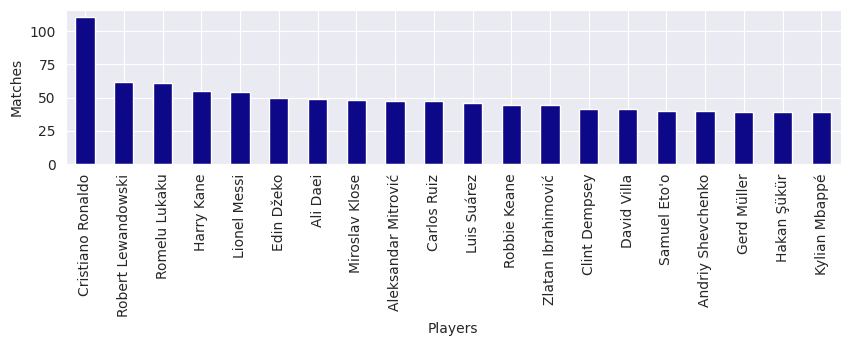

In [11]:
plt.figure(figsize=(10, 2))
df["scorer"].value_counts().head(20).plot(kind="bar", cmap="plasma")
plt.ylabel("Matches")
plt.xlabel("Players")
plt.show()

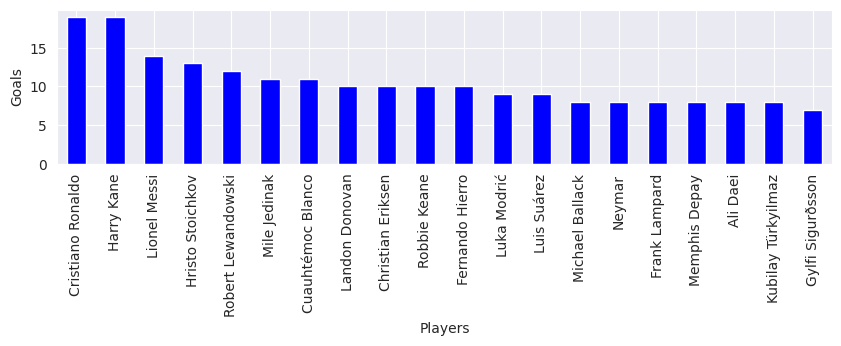

In [6]:
plt.figure(figsize=(10, 2))
df[df["penalty"]==True]["scorer"].value_counts().head(20).plot(kind="bar", cmap="bwr")
plt.ylabel("Goals")
plt.xlabel("Players")
plt.show()

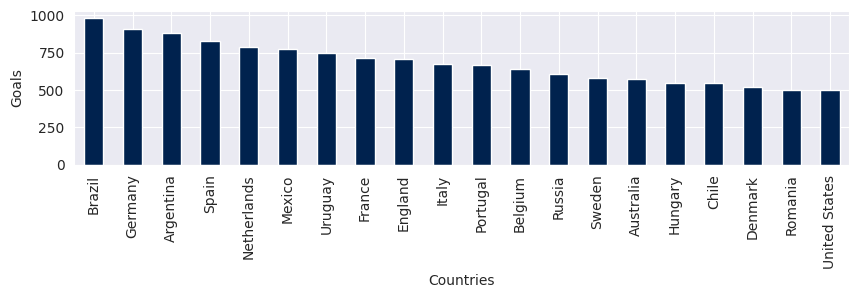

In [7]:
plt.figure(figsize=(10, 2))
df[df["penalty"]==False]["team"].value_counts().head(20).plot(kind="bar", cmap="cividis")
plt.ylabel("Goals")
plt.xlabel("Countries")
plt.show()

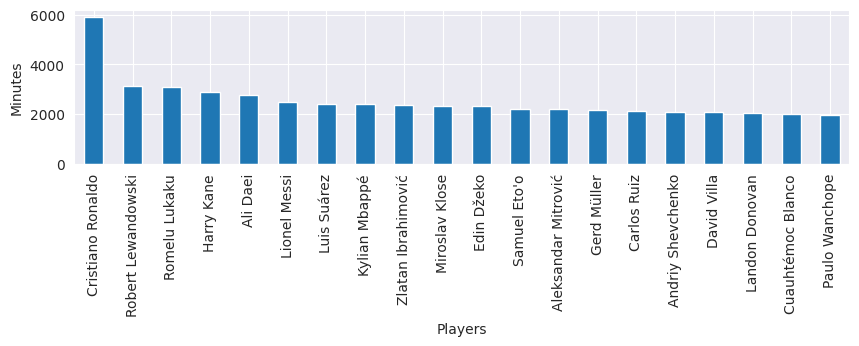

In [8]:
plt.figure(figsize=(10, 2))
playing_time = df.groupby("scorer")["minute"].sum()
playing_time.sort_values(ascending=False).head(20).plot(kind="bar")
plt.ylabel("Minutes")
plt.xlabel("Players")
plt.show()

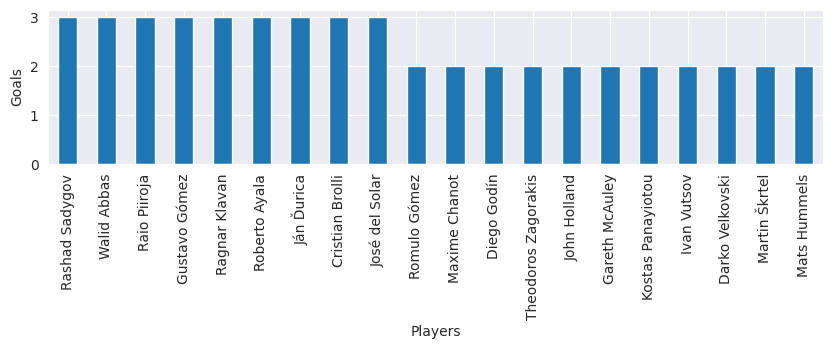

In [9]:
plt.figure(figsize=(10, 2))
x = df[df["own_goal"]==True]
x["scorer"].value_counts().head(20).plot(kind="bar")
plt.ylabel("Goals")
plt.xlabel("Players")
plt.show()

In [28]:
# Supongo que el DataFrame ya está cargado y preprocesado como df
# Si aún no está cargado:
# df = pd.read_csv('/kaggle/input/international-football-results-from-1872-to-2017/goalscorers.csv')

# Seleccionar las características (X) y la variable objetivo (y)
# Vamos a predecir si un gol es en propia puerta (own_goal)
y = df['own_goal']
X = df.drop(['date', 'scorer', 'minute', 'own_goal'], axis=1)

# Verificar las formas de X y y
print(X.shape, y.shape)


(44110, 225) (44110,)


In [20]:
from sklearn.model_selection import train_test_split

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos de datos
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(35288, 225) (8822, 225) (35288,) (8822,)


In [21]:
pip install tensorFlow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB ? eta 0:00:000:00:0100:03m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 315.6 kB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 6.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 8.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 4.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 4.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 4.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 7.1

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Cargar los datos
data = pd.read_csv('goalscorers.csv')

# Preprocesamiento de datos
data['date'] = pd.to_datetime(data['date'])
data['hour'] = data['date'].dt.hour
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month

# Seleccionar características y etiquetas
X = data[['hour', 'day_of_week', 'month']].values
y = data['scorer']

# Codificar las etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape para LSTM (número de muestras, número de pasos de tiempo, número de características)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Construir la red neuronal recurrente (LSTM)
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True),
    LSTM(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Ajustar el modelo
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/20


/opt/conda/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1103/1103 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.0019 - loss: 9.4674 - val_accuracy: 0.0029 - val_loss: 9.3914
Epoch 2/20
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.0023 - loss: 9.1011 - val_accuracy: 0.0029 - val_loss: 9.5738
Epoch 3/20
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.0020 - loss: 9.0089 - val_accuracy: 0.0029 - val_loss: 9.6760
Epoch 4/20
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.0026 - loss: 8.8587 - val_accuracy: 0.0031 - val_loss: 9.9558
Epoch 5/20
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.0026 - loss: 8.7302 - val_accuracy: 0.0032 - val_loss: 10.2526
Epoch 6/20
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.0031 - loss: 8.6646 - val_accuracy: 0.0024 - val_loss: 10.3700
Epoch 7/20
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.0034 - loss: 8.5605 - val_accuracy: 0.0034 - val_loss: 10.7824
Epoch 8/20
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.0035 - loss: 8

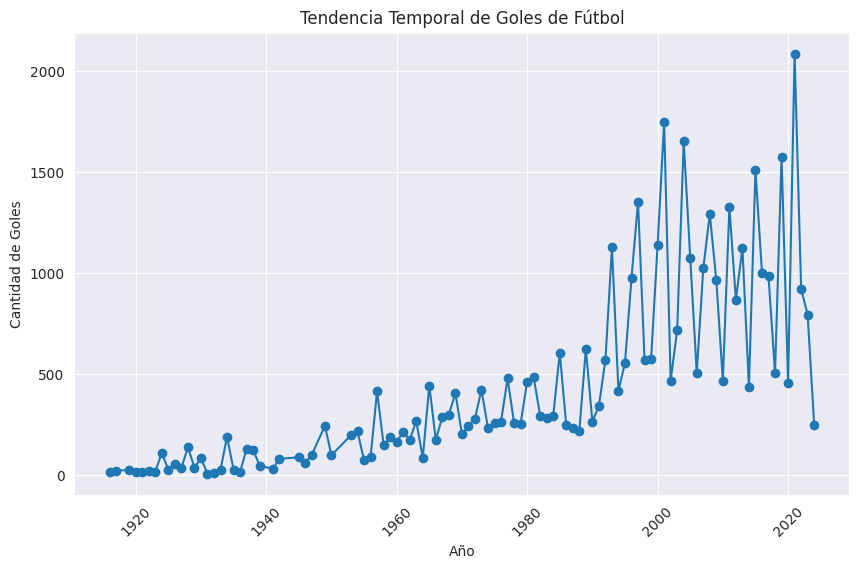

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'date' a tipo datetime
data['date'] = pd.to_datetime(data['date'])

# Extraer el año de la fecha
data['year'] = data['date'].dt.year

# Agrupar los datos por año y contar la cantidad de goles en cada año
goals_per_year = data.groupby('year').size()

# Visualizar la tendencia temporal de los goles
plt.figure(figsize=(10, 6))
plt.plot(goals_per_year.index, goals_per_year.values, marker='o', linestyle='-')
plt.title('Tendencia Temporal de Goles de Fútbol')
plt.xlabel('Año')
plt.ylabel('Cantidad de Goles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
